In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#importing dependencies
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

## **Reading the Cleaned Dataset**

In [ ]:
df=pd.read_csv("Health_care.csv")

In [ ]:
df.isnull().sum()

Product_id            0
description       80130
title                 0
imUrl                 0
related               0
salesRank             0
categories            0
price                 0
brand                 4
reviewerID            0
reviewerName         38
reviewText           77
overall               0
summary              10
unixReviewTime        0
reviewTime            0
sentiment             0
Helpful               0
Not_helpful           0
helpful_rate          0
neg                   0
neu                   0
pos                   0
polarity              0
word_count            0
dtype: int64

<font color='sienna'> **As we converted the data to csv some empty strings were converted to null values as the number of null values is very less we will drop the values**.

In [ ]:
df.drop('description',axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['reviewTime']=pd.to_datetime(df['reviewTime'])

In [ ]:
df.dtypes

Product_id                object
title                     object
imUrl                     object
related                   object
salesRank                  int64
categories                object
price                    float64
brand                     object
reviewerID                object
reviewerName              object
reviewText                object
overall                  float64
summary                   object
unixReviewTime             int64
reviewTime        datetime64[ns]
sentiment                 object
Helpful                    int64
Not_helpful                int64
helpful_rate             float64
neg                      float64
neu                      float64
pos                      float64
polarity                 float64
word_count                 int64
dtype: object

In [ ]:
neg = df[df['sentiment']=='Negative'] #filtering as per negative sentiment

In [ ]:
neg.head(2)

,Product_id,title,imUrl,related,salesRank,categories,price,brand,reviewerID,reviewerName,...,reviewTime,sentiment,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count
0,B0059IU3TG,Absonutrix Fucoxanthin Slim Patches - 30 Patch...,http://ecx.images-amazon.com/images/I/614vz80j...,"{'also_bought': ['B0059IAWNI', 'B005FYO4OE', '...",36711,"[['Health & Personal Care', 'Vitamins & Dietar...",15.95,Absonutrix Fucoxanthin Patch,A1L7MPGNGTCDOG,djpetrik,...,2014-02-12,Negative,0,0,0.0,0.000,1.000,0.000,0.0000,20
1,B001AJ6YS2,Philips Norelco 7310 Men's Shaving System,http://ecx.images-amazon.com/images/I/31kbFfBR...,"{'also_bought': ['B000068PBT', 'B001AJ8YGC', '...",15682,"[['Health & Personal Care', 'Personal Care', '...",79.99,Philips,AM12RRYC66CO1,"Tati Ard ""collegebuyer09""",...,2012-03-11,Negative,0,2,0.0,0.139,0.839,0.022,-0.7896,50


### Checking the which product was sold most for analysis.

In [ ]:
pid = pd.DataFrame(neg.groupby(['Product_id'])['reviewText'].count())
pid.sort_values(['reviewText'],ascending=False)

,reviewText
Product_id,
B009VUZJTM,224
B0095PZHPE,188
B00CJAV0US,173
B005LP5AA4,153
B00383I8T6,148
...,...
B001V9QW2E,1
B001V9QM2E,1
B001V9OQBI,1


# Time series

 **This is the topmost product so using it for the sentiment prediction of time series B009VUZJTM**

In [ ]:
def forecast(choice):
    p_data = df[df['Product_id']==str(choice)]
    df1 = pd.DataFrame(p_data.groupby(['reviewTime'])['polarity'].sum())
    return df1

In [ ]:
n=input("enter product id: ")
date_df = forecast(n)


enter product id: B009VUZJTM


In [ ]:
date_df

,polarity
reviewTime,
2012-07-07,0.6808
2012-07-23,0.8590
2012-07-27,1.8433
2012-07-29,0.9536
2012-07-30,0.6369
...,...
2014-07-08,-0.3595
2014-07-09,1.4263
2014-07-10,2.7133


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose #to decompose time series data

In [ ]:
pol = date_df['polarity']

In [ ]:
#time series components
decomp2 = seasonal_decompose(pol,period =52)
d_trend2 = decomp2.trend #trend in the data
d_seasonal2 = decomp2.seasonal #seasonality in the data
d_residual2 = decomp2.resid #residuals in the data

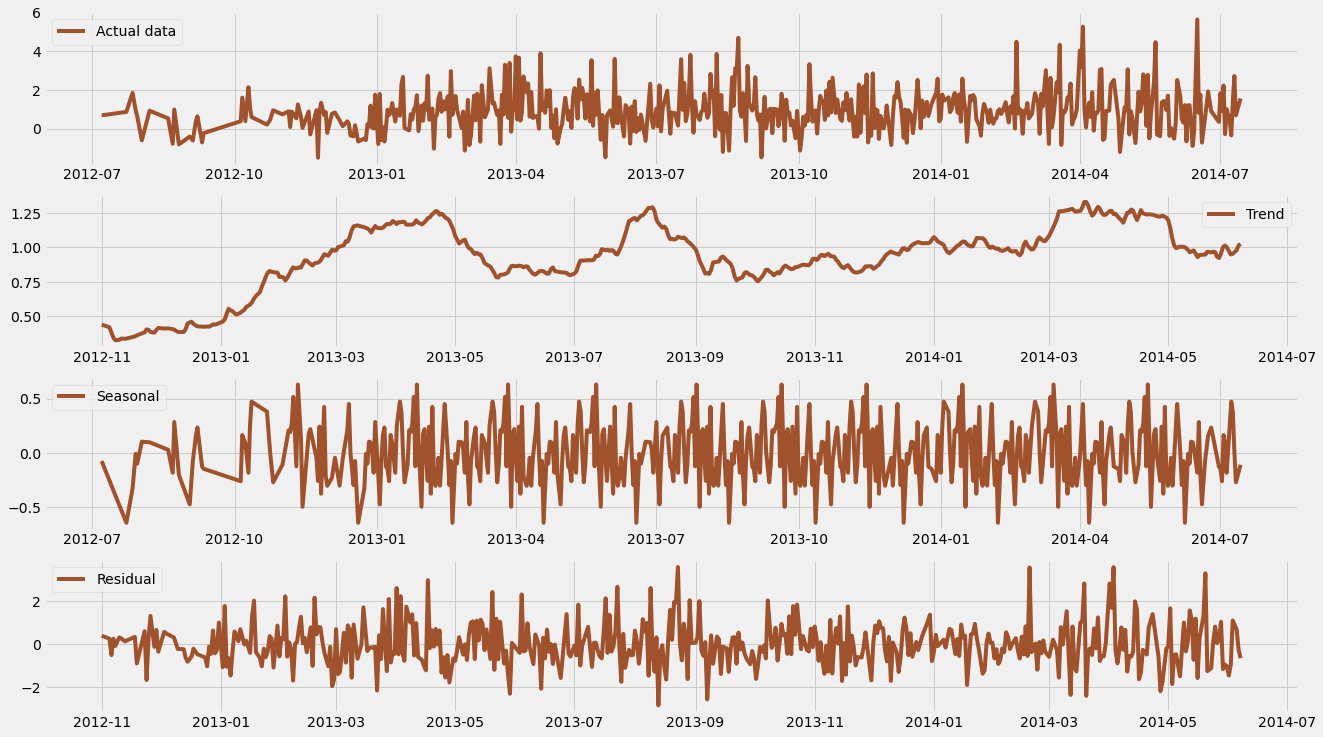

In [ ]:
# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(pol,label='Actual data',color='sienna')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend2,label='Trend',color='sienna')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal2,label='Seasonal',color='sienna')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual2,label='Residual',color='sienna')
plt.legend(loc='best')

plt.show()

### <div class="alert alert-warning">Interpretation:
  - The first visual shows the product sentiment which took place over years.
  - The second visual shows a positive trend.
  - The third visual shows a repeating pattern that mean there is some seasonality.
  - The fourth visual shows the irregularities in the dataset.
    </div>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #for acf and pacf plots

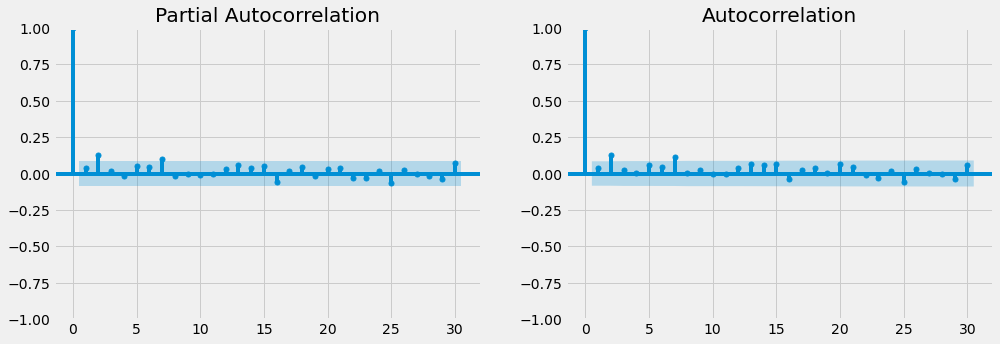

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plot_pacf(pol ,lags=30,ax=ax[0]);
plot_acf(pol,lags=30,ax = ax[1]);

### <div class="alert alert-warning">Interpretation:
  The above visual shows the autocorrelation and partial autocorrelation of the data where p =2 and q=2
</div>

In [ ]:
from pmdarima.arima import auto_arima #for arima

In [ ]:
auto = auto_arima(pol,start_p=0,max_p=2, start_q=0,max_q=2, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1991.725, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1800.358, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1631.564, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1989.725, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1633.553, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1633.555, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1635.563, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1630.358, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1632.358, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1632.358, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1798.359, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1633.609, Time=0.57 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.671 seconds


In [ ]:
# split the data into train and test
split = int(0.8 * len(pol))

train = pol.iloc[:split] #training
test =  pol.iloc[split:] #testing
print("Train shape = {}, Test shape= {}".format(len(train), len(test))) 

Train shape = 437, Test shape= 110


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX #for sarima and sarimax modelling
import statsmodels.api as sm #for checking model goodness

In [ ]:
sarima_model = sm.tsa.statespace.SARIMAX(train,order=(0,1,1),seasonal_order =(0,1,1,52)).fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
sarima_forecast = sarima_model.forecast(len(test))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
sarima_forecast

437    1.115955
438    1.627820
439    1.379197
440    1.185470
441    0.905988
         ...   
542    1.743122
543    1.494500
544    1.300772
545    1.021291
546    0.885861
Name: predicted_mean, Length: 110, dtype: float64

__As the dates were not in a frequency the forecasted dates cannot be predicted by the model.so we will extract the dates from the test data of the dataset.__

In [ ]:
#pol
i=test.index
pol= pd.DataFrame(list(sarima_forecast),index=i)
pol.head()

,0
reviewTime,
2014-03-01,1.115955
2014-03-03,1.627820
2014-03-05,1.379197
2014-03-06,1.185470
2014-03-07,0.905988


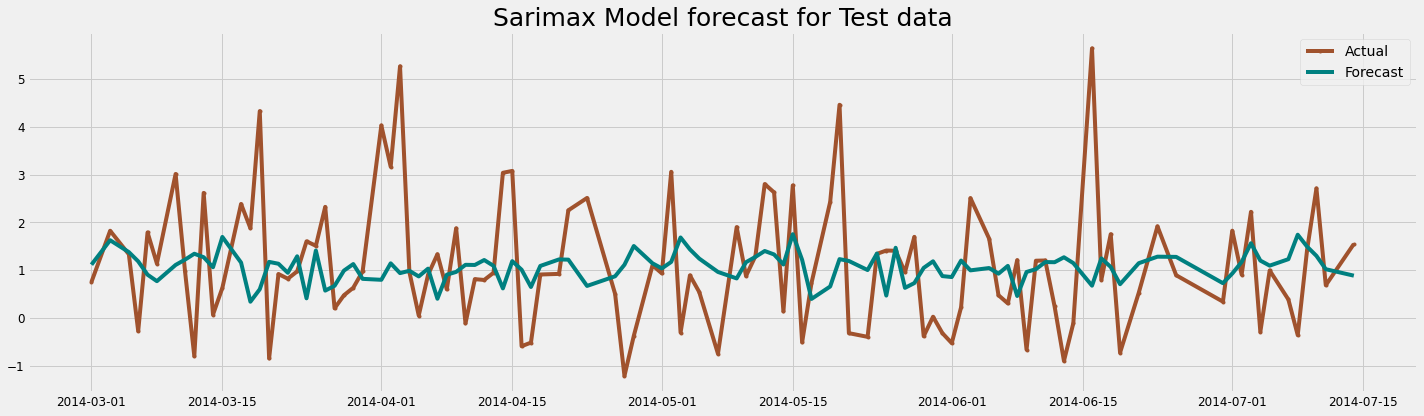

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Sarimax Model forecast for Test data',fontsize=25)
plt.plot(test,marker = '.', color = 'sienna' , label = 'Actual')
plt.plot(pol[0],color = 'teal' , label = 'Forecast' )
plt.tick_params(labelsize=12)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error #for calculating errors
sarima_rmse = mean_squared_error(test,sarima_forecast,squared=False)
print('RMSE :',sarima_rmse)

sarima_aic = sarima_model.aic
sarima_bic = sarima_model.bic

print('sarima aic:',sarima_aic)
print('sarima bic:',sarima_bic)

RMSE : 1.380638768999908
sarima aic: 1217.45731628872
sarima bic: 1229.309243946483


In [ ]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           polarity   No. Observations:                  437
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                -605.729
Date:                            Fri, 09 Dec 2022   AIC                           1217.457
Time:                                    01:34:39   BIC                           1229.309
Sample:                                         0   HQIC                          1222.158
                                            - 437                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9588      0.016    -61.067      0.000      -0.990      -0.928
ma.S.L52      -0.8917      0.108     -8.239      0.000      -1.104      -0.680
sigma2         1.1239      0.106     10.599      0.000       0.916       1.332
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                37.84
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.54
Prob(H) (two-sided):                  0.72   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pol.tail()

,0
reviewTime,
2014-07-08,1.743122
2014-07-09,1.494500
2014-07-10,1.300772
2014-07-11,1.021291
2014-07-14,0.885861


__As the dates are not in frequency we will store them in seperate list and append them to the future predictions.__

In [ ]:
from datetime import datetime, timedelta
datetime_str = '07/14/14'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y')
days = pd.date_range(datetime_object, datetime_object + timedelta(99), freq='D')
days

DatetimeIndex(['2014-07-14', '2014-07-15', '2014-07-16', '2014-07-17',
               '2014-07-18', '2014-07-19', '2014-07-20', '2014-07-21',
               '2014-07-22', '2014-07-23', '2014-07-24', '2014-07-25',
               '2014-07-26', '2014-07-27', '2014-07-28', '2014-07-29',
               '2014-07-30', '2014-07-31', '2014-08-01', '2014-08-02',
               '2014-08-03', '2014-08-04', '2014-08-05', '2014-08-06',
               '2014-08-07', '2014-08-08', '2014-08-09', '2014-08-10',
               '2014-08-11', '2014-08-12', '2014-08-13', '2014-08-14',
               '2014-08-15', '2014-08-16', '2014-08-17', '2014-08-18',
               '2014-08-19', '2014-08-20', '2014-08-21', '2014-08-22',
               '2014-08-23', '2014-08-24', '2014-08-25', '2014-08-26',
               '2014-08-27', '2014-08-28', '2014-08-29', '2014-08-30',
               '2014-08-31', '2014-09-01', '2014-09-02', '2014-09-03',
               '2014-09-04', '2014-09-05', '2014-09-06', '2014-09-07',
      

In [ ]:
future_forecast = sarima_model.forecast(100)
future_forecast

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


437    1.115955
438    1.627820
439    1.379197
440    1.185470
441    0.905988
         ...   
532    1.146989
533    1.283612
534    1.279083
535    0.728508
536    0.930682
Name: predicted_mean, Length: 100, dtype: float64

In [ ]:
df_p_f= pd.DataFrame(list(future_forecast),index=days)

In [ ]:
df_p_f.head()

,0
2014-07-14,1.115955
2014-07-15,1.627820
2014-07-16,1.379197
2014-07-17,1.185470
2014-07-18,0.905988


__We can observe that our future prediction data has a downward trend and seasonality present.__

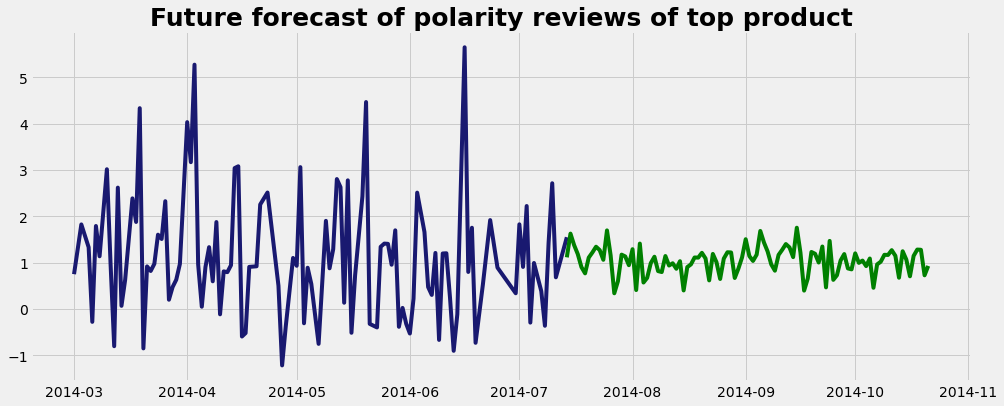

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Future forecast of polarity reviews of top product',fontsize=25,fontweight="bold")
plt.plot(test, color = 'midnightblue' , label = 'Actual')
plt.plot(df_p_f[0],color = 'green' , label = 'positive sentiment Forecast' )

plt.show()

### <div class="alert alert-warning">Interpretation:
  __The above visual shows future forecast for next 100 days using sarima model.__
</div>

In [ ]:
p_data = neg[neg['Product_id']=='B009VUZJTM']
final =p_data[['Product_id','sentiment','summary']]

In [ ]:
p_data.title.value_counts()

NatureWise Green Coffee Bean Extract 800 with GCA Natural Weight Loss Supplement, 60 Count    224
Name: title, dtype: int64

In [ ]:
from pandas import option_context

with option_context('display.max_colwidth',200):
    display(final)
    

,Product_id,sentiment,summary
42,B009VUZJTM,Negative,did not work
177,B009VUZJTM,Negative,This item is a scam!
905,B009VUZJTM,Negative,Don't work
1706,B009VUZJTM,Negative,waste of money
2151,B009VUZJTM,Negative,Terrible
...,...,...,...
82553,B009VUZJTM,Negative,I dont know...
82985,B009VUZJTM,Negative,Hmm..
83220,B009VUZJTM,Negative,Ho-Hum
83917,B009VUZJTM,Negative,Didn't have the great results others had.


# <div class="alert alert-success"><center>Inferences</div>
    
 - We are able to demonstrate how the sentiment of unstructured text data varies over time and utilise it to forecast future data trends by combining time series analysis with natural language processing. So, for our time series analysis, we gave the polarity feature some thought.
 - In order to predict future review sentiments for the goods included in the Health care and personal care dataset, we used the polarity feature for the most sold product.
 - **NatureWise Green Coffee Bean Extract 800 with GCA Natural Weight Loss Supplement** is the product which got more reviews and most of the reviews shows that the product did not satisfy the customer need. If the brand wishes to improve their product rating and the sales of the product they should pay attention to the things that are lacking in their product.
 
    
   
    

# <div class="alert alert-warning"><center>END</div>